# Statistical Tests (A/B Testing)

## Steps to Assess Statistical Significance: <a name="assess-significance"></a>
1. Formulate Hypotheses:
    * Null Hypothesis (H0): there is no effect, and any observed results are due to random chance.
    * Alternative Hypothesis (H1 or Ha): there is a real effect or difference.

2. Choose Significance Level (α): The probability of rejecting the null hypothesis when it is true (Type I error). Commonly 0.05.

3. Select Statistical Test: Common tests include t-tests, chi-square tests, ANOVA, and regression analysis.

4. Calculate Test Statistic and P-value


### Sample Size and Statstical Power: <a name="Sample-Size-and-Statstical-Power"></a>
<br>
Significance Level (α) and Power (1-β)


|                          | **$H_0$ is True**   | **$H_0$ is False** |
|--------------------------|---------------------|--------------------|
| **Test Rejects $H_0$**   | α                   | 1-β                |
| **Test Accepts $H_0$**   | 1-α                 | β                  |

Where 
* β = probability of a Type II error, known as a "false negative"
* 1 − β = probability of a "true positive", i.e., correctly rejecting the null hypothesis. "1 − β" is also known as the power of the test.
* α = probability of a Type I error, known as a "false positive"
* 1 − α = probability of a "true negative", i.e., correctly not rejecting the null hypothesis

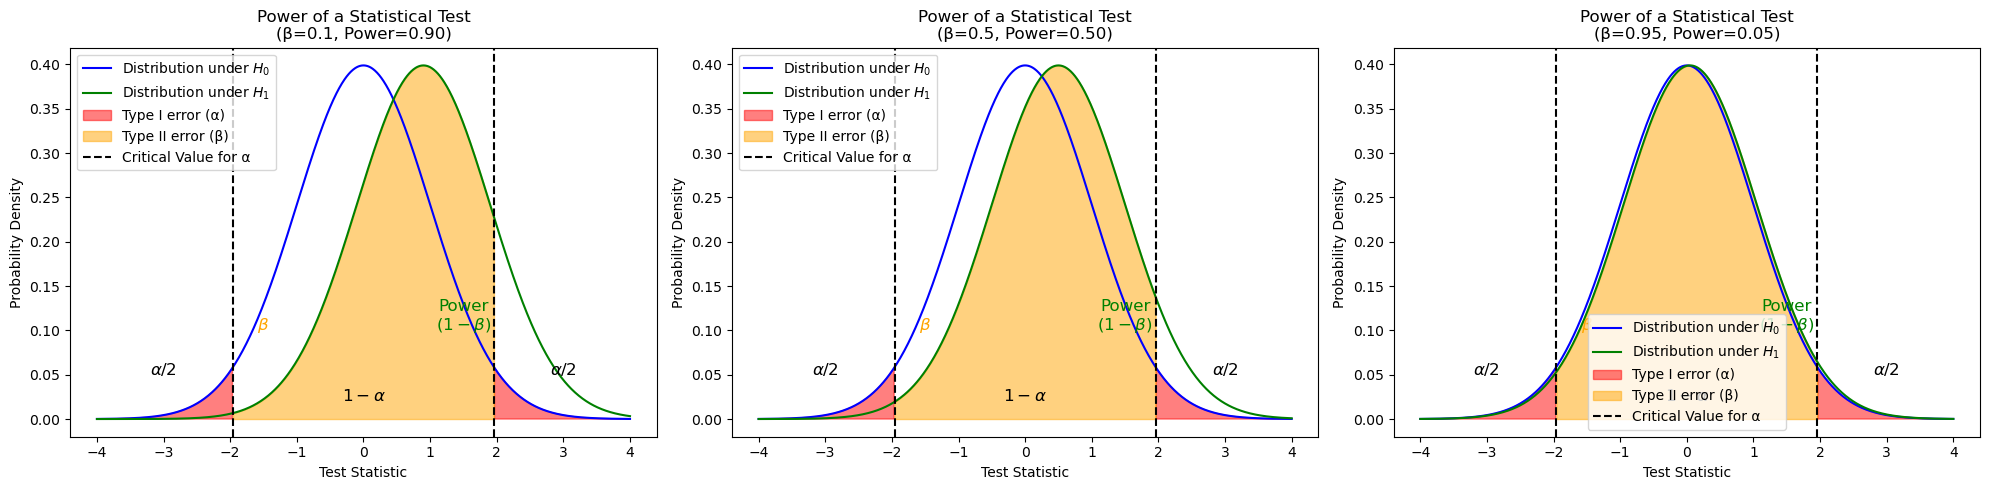

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

alpha = 0.05
betas = [0.1, 0.5, 0.95]
powers = [1 - beta for beta in betas]
x = np.linspace(-4, 4, 1000)
critical_value = stats.norm.ppf(1 - alpha/2)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for ax, beta, power in zip(axs, betas, powers):
    ax.plot(x, stats.norm.pdf(x), label='Distribution under $H_0$', color='blue')
    ax.plot(x, stats.norm.pdf(x, loc=power), label='Distribution under $H_1$', color='green')
    ax.fill_between(x, stats.norm.pdf(x), where=(x >= critical_value) | (x <= -critical_value), color='red', alpha=0.5, label='Type I error (α)')
    ax.fill_between(x, stats.norm.pdf(x, loc=power), where=(x < critical_value) & (x > -critical_value), color='orange', alpha=0.5, label='Type II error (β)')
    ax.axvline(critical_value, color='black', linestyle='--', label='Critical Value for α')
    ax.axvline(-critical_value, color='black', linestyle='--')
    ax.text(3, 0.05, '$\\alpha/2$', horizontalalignment='center', fontsize=12)
    ax.text(-3, 0.05, '$\\alpha/2$', horizontalalignment='center', fontsize=12)
    ax.text(0, 0.02, '$1-\\alpha$', horizontalalignment='center', fontsize=12)
    ax.text(1.5, 0.1, 'Power\n$(1-\\beta)$', horizontalalignment='center', fontsize=12, color='green')
    ax.text(-1.5, 0.1, '$\\beta$', horizontalalignment='center', fontsize=12, color='orange')
    ax.set_xlabel('Test Statistic')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Power of a Statistical Test\n(β={beta}, Power={power:.02f})')
    ax.legend()
plt.tight_layout()
plt.show()

### Margin of Error (MoE)  <a name="Margin of Error"></a>
Expresses the sampling error in a survey’s results. It is a range within which the true population parameter is expected to lie, with a certain level of confidence. Used for many things including sample size determination.

Sample proportion MoE:

$$\text{MoE} = z \times \sqrt{\frac{p(1-p)}{n}}$$

Where:
* z is the critical value from the standard normal distribution corresponding to the desired confidence level (e.g., 1.96 for 95% confidence).
* p is the sample proportion.
* n is the sample size.

Sample mean MoE:

$$ \text{MoE} = t \times \frac{s}{\sqrt{n}} $$

Where:
* t is the critical value from the t-distribution corresponding to the desired confidence level and degrees of freedom.
* s is the sample standard deviation.
* n is the sample size.

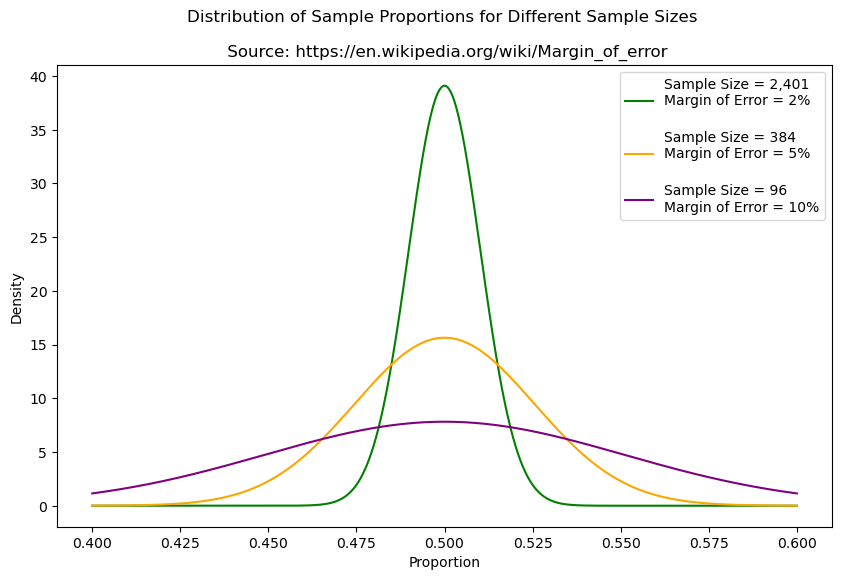

In [2]:
plt.figure(figsize=(10, 6))

x = np.linspace(0.40, 0.60, 1000)
mean = 0.50
sample_sizes = [2401, 384, 96]
margins_of_error = [0.02, 0.05, 0.10]
colors = ['green', 'orange', 'purple']
labels = ["Sample Size = 2,401\nMargin of Error = 2%\n",
          "Sample Size = 384\nMargin of Error = 5%\n",
          "Sample Size = 96\nMargin of Error = 10%"]

for sample_size, margin_of_error, color, label in zip(sample_sizes, margins_of_error, colors, labels):
    std_dev = margin_of_error / 1.96  # Approximation of standard deviation
    y = stats.norm.pdf(x, mean, std_dev)
    plt.plot(x, y, color=color, label=label)

plt.xlabel('Proportion')
plt.ylabel('Density')
plt.title('Distribution of Sample Proportions for Different Sample Sizes \n\n Source: https://en.wikipedia.org/wiki/Margin_of_error')
plt.legend()
plt.show()

### Confidence Intervals (CI)  <a name="Confidence Intervals"></a>
CI is a range of values that are likely to contain the true population parameter (e.g. mean) with a level of confidence. The confidence level represents the proportion of times that the CI would contain the true parameter if the same population were sampled multiple times.

Misrepresentation: "There is a 95% probability that the true parameter lies within this interval." <br>
True Interpretation: "If we were to take many samples and construct a confidence interval from each sample, we expect 95% of those intervals to contain the true parameter. For any given interval, the true parameter either is in the interval or it isn't."

## Common Statstical Tests <a name="common-statistical-tests"></a>

### **T-tests**: Compare the means of two groups. <a name="t-tests"></a>
**Assumptions**: Normal distribution of data, equal variances between groups, and independence of observations.<br>
**Types**: <br>
    - One-sample T-Test: Compares the means of the sample data to the population (e.g., Sample from a factory process). <br>
    - Independent (Two-sample) T-test: Compares the means of two independent groups (e.g., comparing the heights of men and women). <br>
    --  Welch's T-Test for Unequal Variances should be used instead of the independent t-test regardless since it is more robust. It can be applied without any substantial disadvantages to Student's t-test. It's *not recommended* to pre-test for equal variances and then choose between Student's t-test or Welch's t-test. <br>
    - Paired (Dependent) T-test: Compares the means of two related groups (e.g., comparing the weights of individuals before and after a diet).

### **Wilcoxon Signed-Rank Test**: Non-parametric test to compare the means of two groups. <a name="Wilcoxon-Signed-Rank"></a>
**Assumptions**: The data should be ordinal, interval, or ratio scales where ranking is meaningful. While it does not require normality, it assumes that the differences between pairs are symmetrically distributed around the median. <br>
**Note**: More robust alternative to the t-test when dealing with outliers, as it is less sensitive to extreme values due to its reliance on ranks rather than raw data.
 
### **ANOVA (Analysis of Variance)**: Compare the means of three or more groups. <a name="anova-analysis-of-variance"></a>
**Assumptions**: Assumes normal distribution of data, homogeneity of variances, and independence of observations.<br>
**Types**:<br>
    - One-way ANOVA: Compares the means of multiple groups based on one factor (e.g., comparing the test scores of students from different schools).<br>
    - Two-way ANOVA: Compares the means of groups based on two factors (e.g., comparing the test scores of students from different schools and different grades). <br>
**Note**: Analysis on a one way ANOVA with two independent samples is a T-test.

### **Chi-squared Tests**: Test the relationship between categorical variables. <a name="chi-squared-tests"></a>
**Assumptions**: Assumes a sufficient sample size (expected frequencies in each cell should be at least 5) and independence of observations. <br>
**Types**: <br>
    - Independence: Assesses whether there is an association between two categorical variables (e.g., gender and voting preference). <br>
    - Goodness-of-Fit: Tests whether the distribution of a single categorical variable matches an expected distribution (e.g., testing if a die is fair). <br>
    - Homogeneity: Test if samples came from the same population.

**Fisher's Exact Test**: Test relationship between categorical variables for small sample sizes or small expected frequencies<a name="fishers-exact-test"></a>
**Assumptions**: Assumes a sufficient sample size (expected frequencies in each cell should be at least 5) and independence of observations. <br>

**G-test (Likelihood Ratio Test)**: Increasingly being used over chi-squared tests due to better accuracy and interpretability in some cases <a name="g-test"></a>

### **Regression Analysis**: Model the relationship between a dependent variable and one or more independent variables. <a name="regression-analysis"></a>
**Assumptions**: Assumes linearity (linear relationship between dependent and independent variables), independence of errors, homoscedasticity (constant variance of errors), and normality of errors for linear regression. <br>
**Types**:<br>
    - Simple Linear Regression: Models the relationship between a dependent variable and a single independent variable (e.g., predicting sales based on advertising budget).<br>
    - Multiple Linear Regression: Models the relationship between a dependent variable and multiple independent variables (e.g., predicting house prices based on size, location, and number of rooms).<br>
    - Logistic Regression: Used for binary classification problems (e.g., predicting whether a customer will buy a product or not).<br>

## Examples

### T-Tests: One-Sample
When you need to compare the mean from a single sample against a known or hypothesized population mean under assumptions of normality and random sampling.

T-statistic: -2.5169
P-value: 0.0120
Fail to reject the null hypothesis - sample mean is not significantly different from the population mean.


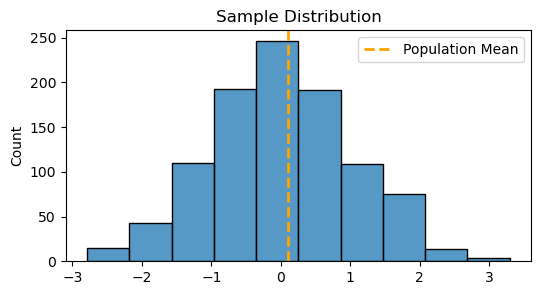

In [3]:
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

rng = np.random.default_rng()

data = rng.standard_normal(1000)
pop_mean = 0.1 # Known or hypothesized population mean
t_stat, p_value = stats.ttest_1samp(data, pop_mean)

print(f"T-statistic: {t_stat:.04f}")
print(f"P-value: {p_value:.04f}")
if p_value > 1-0.05:  # 5% significance level
    print("Reject the null hypothesis - sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis - sample mean is not significantly different from the population mean.")

plt.figure(figsize=(6, 3))
sns.histplot(data, bins=10, color='#1f77b4')
plt.axvline(x=pop_mean, color='orange', linestyle='--', linewidth=2, label='Population Mean')
plt.title('Sample Distribution')
plt.legend()
plt.show()

### T-Tests: Independent (Two-sample)
**Groups**: Compares the means of two independent groups. Subjects in one group have no connection to the subjects in the other group.<br>
**Examples**: Comparing the heights of men and women, or test scores of students from two different schools

T-Test Assuming Equal Variance:
	T-statistic: -1.1475
	P-value: 0.2513

Welch's T-Test for Unequal Variance:
	T-statistic: -1.1475
	P-value: 0.2513


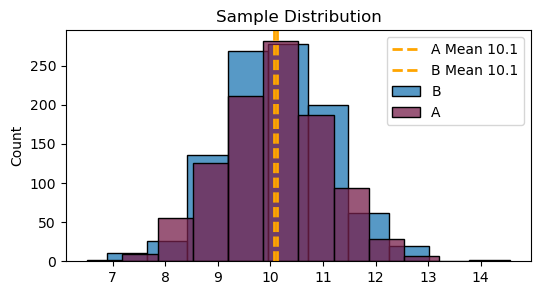

In [4]:
A = rng.normal(10, 1, 1000)
B = rng.normal(10.1, 1, 1000)

t_stat, p_value = stats.ttest_ind(A, B, equal_var=True)
print(f"T-Test Assuming Equal Variance:")
print(f"\tT-statistic: {t_stat:.04f}")
print(f"\tP-value: {p_value:.04f}")

t_stat, p_value = stats.ttest_ind(A, B, equal_var=False)
print(f"\nWelch's T-Test for Unequal Variance:")
print(f"\tT-statistic: {t_stat:.04f}")
print(f"\tP-value: {p_value:.04f}")

plt.figure(figsize=(6, 3))
sns.histplot(B, bins=10, color='#1f77b4', label='B')
sns.histplot(A, bins=10, color='#771f4b', label='A')
plt.axvline(x=A.mean(), color='orange', linestyle='--', linewidth=2, label=f'A Mean {A.mean():.01f}')
plt.axvline(x=B.mean(), color='orange', linestyle='--', linewidth=2, label=f'B Mean {B.mean():.01f}')
plt.title('Sample Distribution')
plt.legend()
plt.show()

### Welch's t-test for unequal variance

T-Test Assuming Equal Variance:
	T-statistic: -2.3476
	P-value: 0.0190

Welch's T-Test for Unequal Variance:
	T-statistic: -2.3476
	P-value: 0.0191


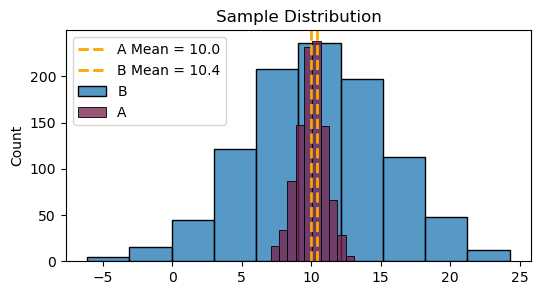

In [5]:
A = rng.normal(10, 1, 1000)
B = rng.normal(10.4, 5, 1000)

t_stat, p_value = stats.ttest_ind(A, B, equal_var=True)
print(f"T-Test Assuming Equal Variance:")
print(f"\tT-statistic: {t_stat:.04f}")
print(f"\tP-value: {p_value:.04f}")

t_stat, p_value = stats.ttest_ind(A, B, equal_var=False)
print(f"\nWelch's T-Test for Unequal Variance:")
print(f"\tT-statistic: {t_stat:.04f}")
print(f"\tP-value: {p_value:.04f}")

plt.figure(figsize=(6, 3))
sns.histplot(B, bins=10, color='#1f77b4', label='B')
sns.histplot(A, bins=10, color='#771f4b', label='A')
plt.axvline(x=A.mean(), color='orange', linestyle='--', linewidth=2, label=f'A Mean = {A.mean():.01f}')
plt.axvline(x=B.mean(), color='orange', linestyle='--', linewidth=2, label=f'B Mean = {B.mean():.01f}')
plt.title('Sample Distribution')
plt.legend()
plt.show()

### T-Tests: Paired (Dependent)
**Groups**: Compares the means of two related groups. Subjects in these groups are connected. Typically through repeated measurements on the same subjects. <br>
**Examples**: Comparing the weights of individuals before and after a diet, or the test scores of students before and after a specific training program

Independent T-Test:
	T-statistic: -3.1681
	P-value: 0.0016

Paired T-Test:
	T-statistic: -3.1551
	P-value: 0.0017


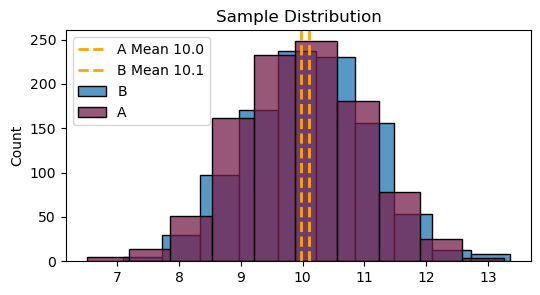

In [6]:
A = rng.normal(10, 1, 1000)
B = rng.normal(10.1, 1, 1000)

t_stat, p_value = stats.ttest_ind(A, B, equal_var=True)
print(f"Independent T-Test:")
print(f"\tT-statistic: {t_stat:.04f}")
print(f"\tP-value: {p_value:.04f}")


t_stat, p_value = stats.ttest_rel(A, B) # Before and After
print(f"\nPaired T-Test:")
print(f"\tT-statistic: {t_stat:.04f}")
print(f"\tP-value: {p_value:.04f}")

plt.figure(figsize=(6, 3))
sns.histplot(B, bins=10, color='#1f77b4', label='B')
sns.histplot(A, bins=10, color='#771f4b', label='A')
plt.axvline(x=A.mean(), color='orange', linestyle='--', linewidth=2, label=f'A Mean {A.mean():.01f}')
plt.axvline(x=B.mean(), color='orange', linestyle='--', linewidth=2, label=f'B Mean {B.mean():.01f}')
plt.title('Sample Distribution')
plt.legend()
plt.show()

Simulate null hypothesis and observe falsely rejecting the null hypothesis at a given p-value probability, regardless of sample size

In [7]:
def reject_or_accept(A, B, alpha=0.05, type='independent'):
    if type == 'independent':
        t_stat, p_value = stats.ttest_ind(A, B) # Group 1 vs Group 2
    elif type == 'welch':
        t_stat, p_value = stats.ttest_ind(A, B, equal_var=False) # Group 1 vs Group 2 with unequal variance
    elif type == 'paired':
        t_stat, p_value = stats.ttest_rel(A, B) # Before and After
    else:
        ValueError('Test type should be either independent, welch, or paired.')
    return True if p_value < alpha else False

def simulate_t_tests(alpha=0.05, type='independent'):
    results = { 10: [], 
                100: [],
                1000: [],
                10000: [] }
    
    for i, sample_size in enumerate(results.keys()):
        for _ in range(1000):
            A = rng.standard_normal(sample_size)
            B = rng.standard_normal(sample_size)
            results[sample_size].append(reject_or_accept(A, B, alpha, type='independent'))
        _, counts = np.unique(np.array(results[sample_size]), return_counts=True)
        print(f"Sample Size: {sample_size} {(len(results)-i)*' '} Reject: {counts[0]}, Accepted: {counts[1]}")

print("Independent ______________________________________________________")
simulate_t_tests(alpha=0.05, type='independent')

print("\nPaired ______________________________________________________")
simulate_t_tests(alpha=0.05, type='paired')

print("\nWelch ______________________________________________________")
simulate_t_tests(alpha=0.05, type='welch')

Independent ______________________________________________________


Sample Size: 10      Reject: 949, Accepted: 51


Sample Size: 100     Reject: 954, Accepted: 46


Sample Size: 1000    Reject: 938, Accepted: 62


Sample Size: 10000   Reject: 947, Accepted: 53

Paired ______________________________________________________


Sample Size: 10      Reject: 949, Accepted: 51


Sample Size: 100     Reject: 952, Accepted: 48


Sample Size: 1000    Reject: 947, Accepted: 53


Sample Size: 10000   Reject: 955, Accepted: 45

Welch ______________________________________________________
Sample Size: 10      Reject: 947, Accepted: 53


Sample Size: 100     Reject: 938, Accepted: 62


Sample Size: 1000    Reject: 943, Accepted: 57


Sample Size: 10000   Reject: 956, Accepted: 44


### Bonferroni correction
When multiple hypothesis tests are conducted, the Bonferroni correction can help to maintain the overall false positive error rate at a desired level.

In [8]:
sample_size = 100
n_tests = 3
data1 = rng.standard_normal(sample_size)
data2 = rng.standard_normal(sample_size)
data3 = rng.standard_normal(sample_size)
t_stat1, p_val1 = stats.ttest_ind(data1, data2)
t_stat2, p_val2 = stats.ttest_ind(data1, data3)
t_stat3, p_val3 = stats.ttest_ind(data2, data3)
print(f"Original p-values: {p_val1:.4f}, {p_val2:.4f}, {p_val3:.4f}")

# Bonferroni correction
alpha = 0.05
bonferroni_alpha = alpha / n_tests
print(f"Bonferroni corrected alpha: {bonferroni_alpha:.4f}")

adjusted_p_val1 = min(p_val1 * n_tests, 1)
adjusted_p_val2 = min(p_val2 * n_tests, 1)
adjusted_p_val3 = min(p_val3 * n_tests, 1)
print(f"Adjusted p-values: {adjusted_p_val1:.4f}, {adjusted_p_val2:.4f}, {adjusted_p_val3:.4f}")

Original p-values: 0.8113, 0.1673, 0.1155
Bonferroni corrected alpha: 0.0167
Adjusted p-values: 1.0000, 0.5020, 0.3464


### Wilcoxon Signed-Rank Test

Test Statistic: 0.0
P-Value: 0.0020
Reject the null hypothesis - suggest a significant difference in sleep duration.

Independent T-Test on the same data:
	Test Statistic: 0.0
	P-Value: 0.0925

Paired T-Test on the same data:
	Test Statistic: 0.0
	P-Value: 0.00001


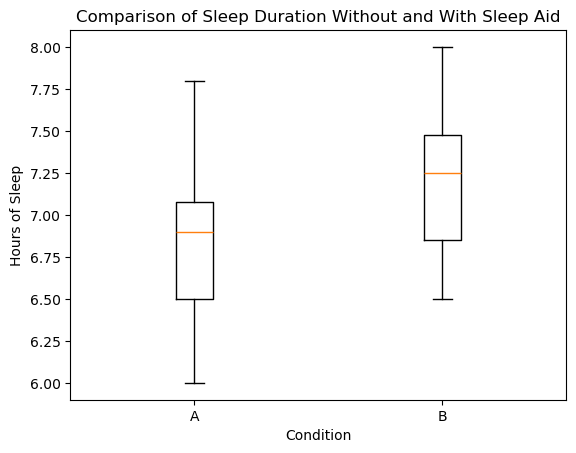

In [9]:
# Data: Sleep duration in hours for 10 participants
A = np.array([7, 6.5, 7.2, 6, 7.8, 6.5, 7, 6.8, 7.1, 6.3]) # Group A: Without sleep aid
B = np.array([7.5, 6.8, 7.4, 6.5, 8, 7, 7.5, 7.2, 7.3, 6.8]) # Group B: With sleep aid
stat, p_value = stats.wilcoxon(A - B)
print(f"Test Statistic: {stat:.04}")
print(f"P-Value: {p_value:.04f}")

if p_value < 0.05:
    print("Reject the null hypothesis - suggest a significant difference in sleep duration.")
else:
    print("Fail to reject the null hypothesis - no significant difference in sleep duration.")

t_stat, p_value = stats.ttest_ind(A, B)
print("\nIndependent T-Test on the same data:")
print(f"\tTest Statistic: {stat:.04}")
print(f"\tP-Value: {p_value:.04f}")

t_stat, p_value = stats.ttest_rel(A, B)
print("\nPaired T-Test on the same data:")
print(f"\tTest Statistic: {stat:.04}")
print(f"\tP-Value: {p_value:.05f}")

fig, ax = plt.subplots()
ax.boxplot([A, B], labels=['A', 'B'])
ax.set_title('Comparison of Sleep Duration Without and With Sleep Aid')
ax.set_ylabel('Hours of Sleep')
ax.set_xlabel('Condition')
plt.show()

### Chi-square Goodness of Fit

Note that chi2_contingency performs a two-sided test, so we're checking for positve and negative effects.

[Khan Academy: Contingency table chi-square test](https://www.youtube.com/watch?v=hpWdDmgsIRE)

Null Hypothesis: Herbs do nothing <br>
Alternative Hypothesis: Herbs do something

In [10]:
#                 Herb 1      Herb 2   Placebo
data = np.array([[20,         30,      30],        # Sick 
                 [100,        110,     90]])       # Not Sick

chi2_stat, p_value, dof, expected = stats.chi2_contingency(data)
print(f"Chi-squared Statistic: {chi2_stat:.04f}")
print(f"P-value: {p_value:.04f}")

Chi-squared Statistic: 2.5258
P-value: 0.2828


### Chi-squared Independence / Fisher's Exact Test / G-Test

In [11]:
# Rows represent categories of variable 1 (e.g., Gender: Male, Female)
# Columns represent categories of variable 2 (e.g., Preference: Yes, No)
contingency_table = np.array([[30, 20],   #   Male: 30 Yes, 20 No
                              [35, 15]])  # Female: 35 Yes, 15 No

chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2_stat:.02f}")
print(f"P-value: {p_val:.04f}\n")

odds_ratio, p_value = stats.fisher_exact(contingency_table)
print(f"Fisher's Exact Test statistic: {odds_ratio:.04f}")
print(f"P-value: {p_value:.04f}\n")

chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table, lambda_="log-likelihood")
print(f"G-Test statistic: {chi2_stat:.02f}")
print(f"P-value: {p_val:.04f}\n")

Chi-squared statistic: 0.70
P-value: 0.4017

Fisher's Exact Test statistic: 0.6429
P-value: 0.4019

G-Test statistic: 0.70
P-value: 0.4013



In [12]:
""" Source: Berger, Jeffrey S. et al. “Aspirin for the Primary Prevention of Cardiovascular Events in Women and Men: A Sex-Specific Meta-analysis of Randomized Controlled Trials.” JAMA, 295(3):306-313, DOI:10.1001/jama.295.3.306, 2006.
        https://jamanetwork.com/journals/jama/article-abstract/202217
        
                    Aspirin   Control/Placebo
Ischemic stroke       176           230
No stroke           21035         21018
"""
contingency_table = np.array([[176, 230], 
                              [21035, 21018]])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2_stat:.02f}")
print(f"P-value: {p_val:.04f}\n")

odds_ratio, p_value = stats.fisher_exact(contingency_table)
print(f"Fisher's Exact Test statistic: {odds_ratio:.04f}")
print(f"P-value: {p_value:.04f}\n")

chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table, lambda_="log-likelihood")
print(f"G-Test statistic: {chi2_stat:.02f}")
print(f"P-value: {p_val:.04f}\n")

Chi-squared statistic: 6.89
P-value: 0.0087

Fisher's Exact Test statistic: 0.7646
P-value: 0.0081

G-Test statistic: 6.91
P-value: 0.0086



### Chi-square Goodness-of-Fit Test:
[Khan Academy Example](https://www.youtube.com/watch?v=2QeDRsxSF9M)

In [13]:
#          Day:     M   T   W   T   F   S
expected_freq =   [.1, .1, .15, .2, .3, .15]  # Expected frequencies in each category. By default the categories are assumed to be equally likely.
observed_counts = [30, 14, 34, 45, 57, 20]  # Observed values in each category.
observed_freq = [i/sum(observed_counts) for i in observed_counts] # Normalize observed values to frequencies.
expected_counts = [int(i*sum(observed_counts)) for i in expected_freq]

chi2_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"Chi-squared Statistic: {chi2_stat:.04f}")
print(f"P-value: {p_value:.04f}")

Chi-squared Statistic: 11.4417
P-value: 0.0433


### G-Test (Goodness-of-Fit):

In [14]:
observed_counts = np.array(observed_counts)
expected_counts = np.array(expected_counts)
G_statistic = 2 * np.sum(observed_counts * np.log(observed_counts / expected_counts))
degrees_of_freedom = len(observed_counts) - 1
p_value = stats.chi2.sf(G_statistic, degrees_of_freedom)
print(f"G-statistic: {G_statistic:.04f}")
print(f"P-value: {p_value:.04f}")

G-statistic: 11.3865
P-value: 0.0442


### One-way ANOVA
Tests whether two or more groups have the same population mean. 

[Zedstatstics Example](https://www.youtube.com/watch?v=9cnSWads6oo)

$
\text{Sum of Squares = SST} = \sum ({X - \overline{X}})^2
$

$
\text{Sum of Squares Within Groups = SSW} = \sum ({\overline{X} - \overline{\overline{X}_i}})^2
$

$
\text{Sum of Squares Between Groups = SSB} = \sum ({X_i - \overline{X}})^2
$


$
\text{F} = \frac{\frac{\text{SSB}}{c - 1}} {\frac{\text{SSW}}{n - c}}
\\ \text{Where:}
\\ \quad \text{c = number of categories}
\\ \quad \text{n = number of observations}
$


In [15]:
def SSW(group):
    X_bar = sum(group) / len(group)
    return sum([(num-X_bar)**2 for num in group])

def SSB(group, global_mean):
    X_bar = sum(group) / len(group)
    return len(group) * (X_bar - global_mean)**2

def f_stat(SSB, SSW, n, c):
    return (SSB / (c-1)) / ((SSW)/(n-c))

In [16]:
group1 = [1, 5, 9]
group2 = [3, 5, 7]
group3 = [4, 5, 6]
groups = [group1, group2, group3]

n = sum([len(group) for group in groups])
c = len(groups)
group_means = [sum(group)/len(group) for group in groups]
global_mean = sum(group_means) / len(group_means)

for group in groups:
    print(group, "     F-Statstic:", f_stat(SSB(group, global_mean), SSW(group), n, c), "   SSW:", SSW(group), "   SSB:", SSB(group, global_mean))

[1, 5, 9]      F-Statstic: 0.0    SSW: 32.0    SSB: 0.0
[3, 5, 7]      F-Statstic: 0.0    SSW: 8.0    SSB: 0.0
[4, 5, 6]      F-Statstic: 0.0    SSW: 2.0    SSB: 0.0


In [17]:
group1 = [1, 3, 5]
group2 = [5, 7, 9]
group3 = [4, 5, 6]
groups = [group1, group2, group3]

n = sum([len(group) for group in groups])
c = len(groups)
group_means = [sum(group)/len(group) for group in groups]
global_mean = sum(group_means) / len(group_means)

for group in groups:
    print(group, "     F-Statstic:", f_stat(SSB(group, global_mean), SSW(group), n, c), "   SSW:", SSW(group), "   SSB:", SSB(group, global_mean))

[1, 3, 5]      F-Statstic: 4.5    SSW: 8.0    SSB: 12.0
[5, 7, 9]      F-Statstic: 4.5    SSW: 8.0    SSB: 12.0
[4, 5, 6]      F-Statstic: 0.0    SSW: 2.0    SSB: 0.0


In [18]:
group1 = [20, 21, 19, 22, 24]
group2 = [28, 32, 30, 29, 27]
group3 = [25, 29, 27, 26, 28]
f_statistic, p_value = stats.f_oneway(group1, group2, group3) # Perform one-way ANOVA
print(f"F-statistic: {f_statistic:.04f}")
print(f"P-value: {p_value:.06f}")

F-statistic: 25.8788
P-value: 0.000044


### Permutation Test

Observed difference in means: -0.0795
P-value from permutation test: 0.5607


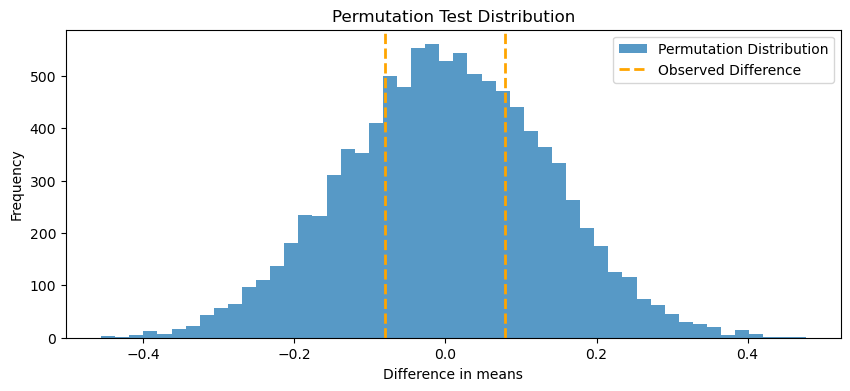

In [19]:
def perform_permutation_test(combined, size1, size2, num_permutations=10000):
    perm_diffs = np.zeros(num_permutations)
    for i in range(num_permutations):
        np.random.shuffle(combined)
        new_group1 = combined[:size1]
        new_group2 = combined[size1:size1+size2]
        perm_diffs[i] = np.mean(new_group2) - np.mean(new_group1)
    return perm_diffs

data_group1 = rng.standard_normal(sample_size)  # Mean score group 1
data_group2 = rng.standard_normal(sample_size) # Mean score of group 2
observed_diff = np.mean(data_group2) - np.mean(data_group1)
combined_data = np.concatenate([data_group1, data_group2])

# Perform the permutation test
perm_diffs = perform_permutation_test(combined_data.copy(), len(data_group1), len(data_group2))
p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))
print(f"Observed difference in means: {observed_diff:.04f}")
print(f"P-value from permutation test: {p_value:.04f}")

plt.figure(figsize=(10,4))
plt.hist(perm_diffs, bins=50, alpha=0.75, label='Permutation Distribution')
plt.axvline(x=observed_diff, color='orange', linestyle='dashed', linewidth=2, label='Observed Difference')
plt.axvline(x=-observed_diff, color='orange', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Difference in means')
plt.ylabel('Frequency')
plt.title('Permutation Test Distribution')
plt.show()

## Sequential Testing
### Alpha-Spending <a name="Alpha-Spending"></a>
O'Brien-Fleming Method: calculates the alpha threshold for a given interim analysis point. This method provides more stringent alpha control early in the experiment and relaxes as more data becomes available.

In [20]:
def obrien_fleming(spending_time, total_time=1.0, alpha=0.05):
    """ Calculate alpha threshold at a given time using O'Brien-Fleming method """
    return (alpha * (stats.norm.ppf(1 - alpha) / stats.norm.ppf(1 - alpha * spending_time / total_time))**2)

# Points in time when the interim analyses are performed (fraction of total data collected)
analysis_points = [0.25, 0.5, 0.75, 1.0]
total_alpha = 0.05
alpha_thresholds = [obrien_fleming(point, total_time=1.0, alpha=total_alpha) for point in analysis_points]

for point, threshold in zip(analysis_points, alpha_thresholds):
    print(f"Analysis at {point*100}% data: Alpha threshold = {threshold:.4f}")

# Example observed p-values from interim analyses
observed_p_values = [0.049, 0.045, 0.025, 0.01]

# Decisions based on alpha-spending
decisions = ["Reject H0" if p <= alpha else "Do not reject H0" for p, alpha in zip(observed_p_values, alpha_thresholds)]
for point, decision in zip(analysis_points, decisions):
    print(f"Decision at {point*100}% data: {decision}")


Analysis at 25.0% data: Alpha threshold = 0.0269
Analysis at 50.0% data: Alpha threshold = 0.0352
Analysis at 75.0% data: Alpha threshold = 0.0427
Analysis at 100.0% data: Alpha threshold = 0.0500
Decision at 25.0% data: Do not reject H0
Decision at 50.0% data: Do not reject H0
Decision at 75.0% data: Reject H0
Decision at 100.0% data: Reject H0


### Bayesian A/B testing <a name="Bayesian"></a>
Estimate the posterior distributions of the metrics of interest (like conversion rates) directly, rather than relying on p-values from hypothesis testing.

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [p_A, p_B]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 2 seconds.


Probability that B is better than A: 0.91


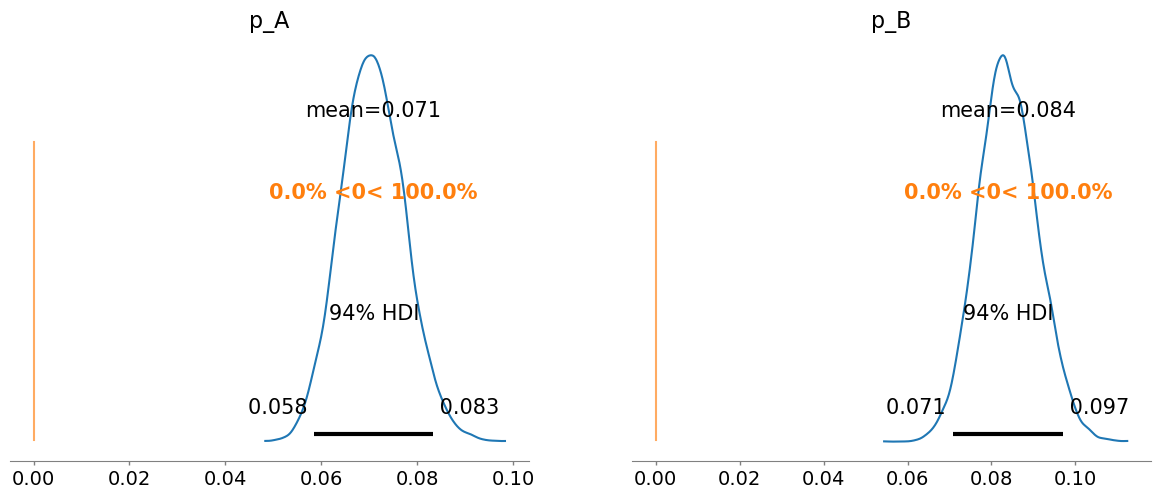

In [21]:
import pymc as pm
import arviz as az

# Simulated conversion data   
# Number of visitors
n_A = 1500 # A: Control group
n_B = 1500 # B: Treatment group
conversions_A = 105  # Number of conversions
conversions_B = 125

with pm.Model() as model:
    # Prior distributions for probabilities of conversion
    p_A = pm.Beta('p_A', alpha=2, beta=10)
    p_B = pm.Beta('p_B', alpha=2, beta=10)

    # Likelihood functions
    obs_A = pm.Binomial('obs_A', n=n_A, p=p_A, observed=conversions_A)
    obs_B = pm.Binomial('obs_B', n=n_B, p=p_B, observed=conversions_B)

    # Sample from the posterior using the No-U-Turn Sampler (NUTS)
    trace = pm.sample(5000, progressbar=False, return_inferencedata=True)  # Ensure InferenceData format is returned

# Plotting the posterior distributions with reference line at 0
az.plot_posterior(trace, var_names=['p_A', 'p_B'], ref_val=0)

# Calculate the probability that B is better than A
prob_B_better_than_A = np.mean(trace.posterior['p_B'].values > trace.posterior['p_A'].values)
print(f"Probability that B is better than A: {prob_B_better_than_A:.2f}")

Example from [Probabilistic Programming and Bayesian Methods for Hackers](https://nbviewer.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC2.ipynb)

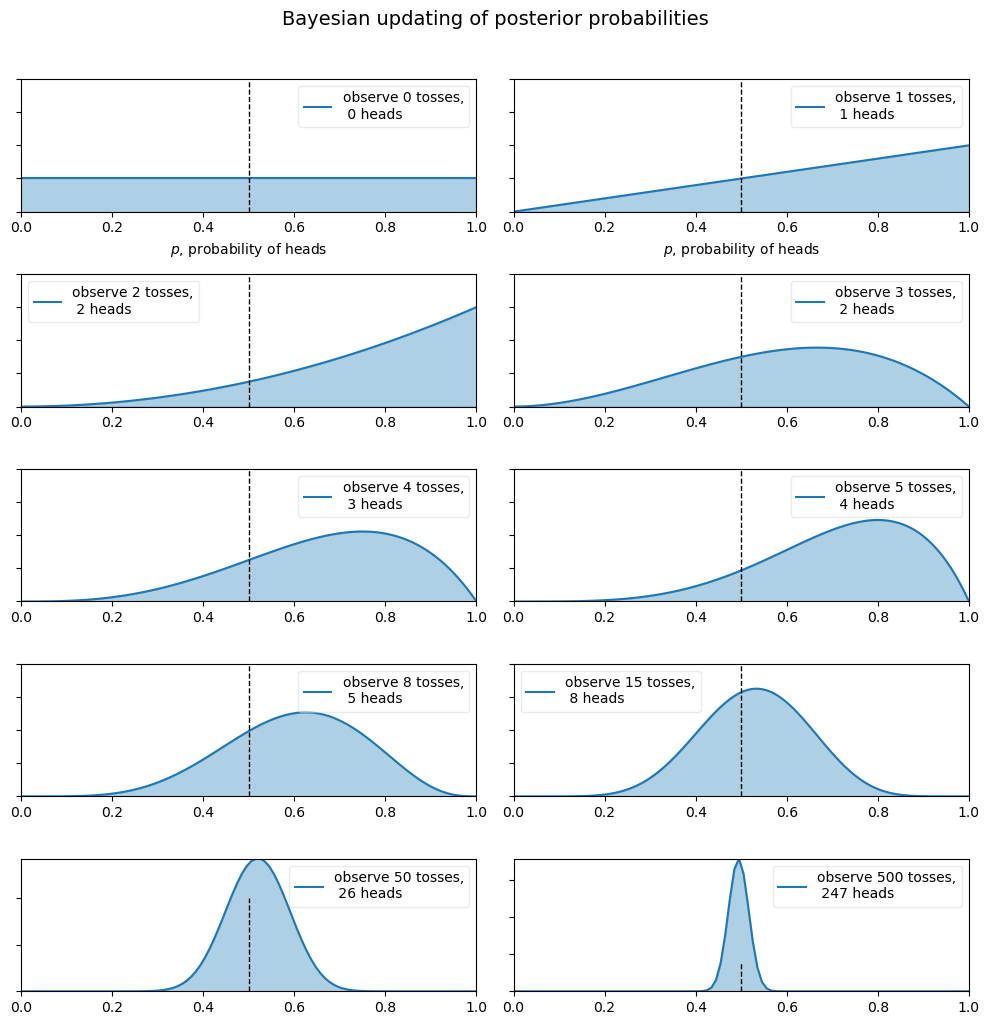

In [22]:
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 10))
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) // 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") if k in [0, 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle("Bayesian updating of posterior probabilities", y=1.02, fontsize=14)
plt.tight_layout()

## Data Distribution Tests

### Shapiro-Wilk Test (Normal Distributions)  <a name="Shapiro-Wilk"></a>
**Purpose**: It checks how well the data conforms to a normal distribution. More powerful than the K-S test in detecting departures from normality, particularly for small to moderate sample sizes (typically less than 50 samples, though it can be used up to 2000).

### Kolmogorov-Smirnov Test <a name="Kolmogorov-Smirnov"></a>
**Purpose**: Used to compare a sample with a reference probability distribution (which can be, but is not limited to, a normal distribution). It tests whether two samples are drawn from the same distribution or to compare a sample with a theoretical distribution such as the normal distribution. Generally, the K-S test is considered reliable for larger samples.

In [23]:
sample_size = 1000
data = rng.standard_normal(sample_size)

# Shapiro-Wilk Test for normality
shapiro_test_stat, shapiro_p_value = stats.shapiro(data)
print(f"Shapiro-Wilk: p-value = {shapiro_p_value:0.04f}")

# Kolmogorov-Smirnov Test comparing sample data to a normal distribution
ks_test_stat, ks_p_value = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
# ks_test_stat, ks_p_value = stats.kstest(data, stats.norm.cdf)
print(f"Kolmogorov-Smirnov: p-value = {ks_p_value:0.04f}")

Shapiro-Wilk: p-value = 0.1095
Kolmogorov-Smirnov: p-value = 0.7703


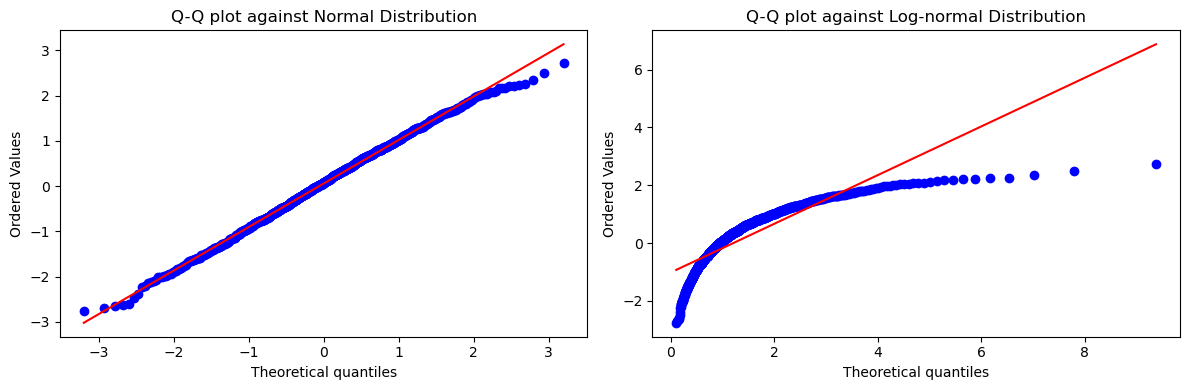

In [24]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
stats.probplot(data, dist=stats.norm, plot=plt)
plt.title('Q-Q plot against Normal Distribution')
plt.subplot(1, 2, 2)
stats.probplot(data, dist=stats.lognorm(s=0.7), plot=plt)
plt.title('Q-Q plot against Log-normal Distribution')
plt.tight_layout() 
plt.show()

### Kullback–Leibler divergence <a name="Kullback–Leibler"></a>
**Purpose**: Measures how one probability distribution is different from a second.

Not typically used for data distribution tests for a few reasons:
1. Doesn't offer a probabilistic interpretation or a hypothesis test framework like p-values.
2. The first distribution $P$ must be continuous with respect to the second distribution $𝑄$. $P$ can only be non-zero where $Q$ is non-zero or the KL divergence will be undefined or infinite.
3. Not symmetric $ D_{KL}(P | Q) ≠ D_{KL}(Q | P) $

Kullback-Leibler Divergence: 0.2603
Kullback-Leibler Divergence (histogram method): 0.1096


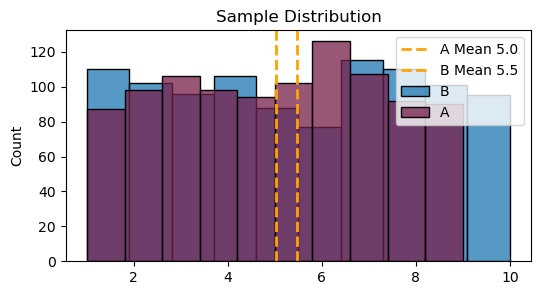

In [25]:
A = rng.uniform(low=1, high=9, size=sample_size)
B = rng.uniform(low=1, high=10, size=sample_size)
p = A + 1e-10  # adding small value to avoid division by zero
q = B + 1e-10  # adding small value to avoid division by zero
kl_divergence = stats.entropy(p, q)
print(f"Kullback-Leibler Divergence: {kl_divergence:0.04f}")

# Alternatively, using histograms
hist_p, bin_edges = np.histogram(p, bins=100, density=True)
hist_q, _ = np.histogram(q, bins=100, density=True)
kl_divergence_hist = stats.entropy(hist_p, hist_q)
print(f"Kullback-Leibler Divergence (histogram method): {kl_divergence_hist:0.04f}")

plt.figure(figsize=(6, 3))
sns.histplot(B, bins=10, color='#1f77b4', label='B')
sns.histplot(A, bins=10, color='#771f4b', label='A')
plt.axvline(x=A.mean(), color='orange', linestyle='--', linewidth=2, label=f'A Mean {A.mean():.01f}')
plt.axvline(x=B.mean(), color='orange', linestyle='--', linewidth=2, label=f'B Mean {B.mean():.01f}')
plt.title('Sample Distribution')
plt.legend()
plt.show()

## Simpson's Paradox <a name="Simpsons-Paradox"></a>
We run an experiment on two days. The first day we apply the treatment to 1% of users and the next day to 50% of users.

The treatment has a better success rate on both days, but when we average the result, it is worse overall due to to weighted averaging.

In [26]:
success_list = []
failure_list = []

def run_experiment(p, num_simulations):
    simulations = np.random.binomial(n=1, p=p, size=num_simulations)
    successes = np.count_nonzero(simulations == 1)
    failures = np.count_nonzero(simulations == 0)
    success_list.append(successes)
    failure_list.append(failures)

# Day 1: 1% Treatment
run_experiment(p=0.5, num_simulations=500)
run_experiment(p=0.55, num_simulations=9500)

# Day 2: 50% Treatment
run_experiment(p=0.6, num_simulations=5000)
run_experiment(p=0.55, num_simulations=5000)

df = pd.DataFrame({
    "Treatment or Control": ["Treatment", "Control", "Treatment", "Control"],
    "Day of Test": ["Day 1", "Day 1", "Day 2", "Day 2"],
    "Success": success_list, 
    "Failure": failure_list
})

df['Rate'] = (100*df['Success'] / (df['Success'] + df['Failure'])).round(0)
print("Daily Results:")
display(df)
print("\nWeighted Average Results:")
df.drop("Day of Test", axis=1, inplace=True)
df.groupby('Treatment or Control').mean()

Daily Results:


,Treatment or Control,Day of Test,Success,Failure,Rate
0,Treatment,Day 1,236,264,47.0
1,Control,Day 1,5194,4306,55.0
2,Treatment,Day 2,2986,2014,60.0
3,Control,Day 2,2740,2260,55.0



Weighted Average Results:

,Success,Failure,Rate
Treatment or Control,,,
Control,3967.0,3283.0,55.0
Treatment,1611.0,1139.0,53.5


## References
* Kohavi, Ron, Diane Tang, and Ya Xu. 2020. ​Trustworthy Online Controlled Experiments: A Practical Guide to A/B Testing. Cambridge University Press. https://experimentguide.com/
* [Analysis of Variance - Wikiversity](https://en.wikiversity.org/wiki/Analysis_of_variance)
